In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['text.usetex'] = True

import numpy as np
import pink_utils as pu
from collections import defaultdict
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [36]:
base= '../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5'
orig = None
diff_first = []
diff_wise = []
stages = []
for c in [0, 1]:
    count = 0
    orig = None
#     for s in [1,2,3,4,5,6]:
    for s in [2,3,4,5,6]:
        for i in range(20):
            som = pu.som(f'{base}_{s}_{i}.bin')
            print(som.path)
            im = som.get_som(channel=c)
            
            if orig is None: 
                orig = im[1]
            else:
                count += 1
                new = im[1]
                ed = np.sqrt( np.sum( (new - orig)**2. ) )
                if c == 0:
                    diff_first.append(ed)
                else:
                    diff_wise.append(ed)
                if i == 0 and c == 0:
                    stages.append(count)
                    
            

../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_0.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_1.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_2.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_3.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_4.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_5.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_6.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_7.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_8.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_9.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_10.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_11.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_12.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95

../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_14.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_15.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_16.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_17.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_18.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_2_19.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_3_0.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_3_1.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_3_2.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_3_3.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_3_4.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_3_5.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_3_6.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S

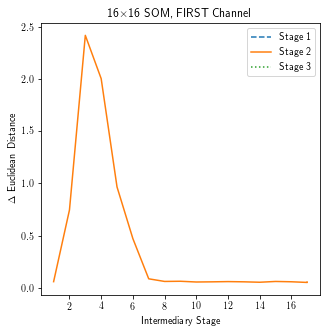

In [37]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.plot(diff[0]['count'], diff[0]['ed'], ls='--' , label='Stage 1')
ax.plot(diff[1]['count'], diff[1]['ed'], ls='-'  ,label='Stage 2')
ax.plot(diff[None]['count'], diff[None]['ed'], ls=':', label='Stage 3')
ax.legend()
ax.set(xlabel='Intermediary Stage', ylabel='$\Delta$ Euclidean Distance',
      title='16$\\times$16 SOM, FIRST Channel')
fig.savefig('Images/Training_Progress.pdf')

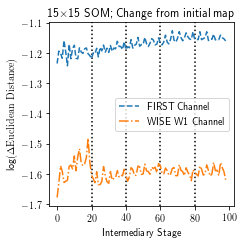

In [38]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.5))

ax.plot(np.arange(len(diff_first)), np.log10(diff_first), ls='--', label='FIRST Channel')
ax.plot(np.arange(len(diff_wise)), np.log10(diff_wise), ls='-.', label='WISE W1 Channel')
for s in stages:
    ax.axvline(s, color='black', ls=':', zorder=0)

ax.legend()
ax.set(xlabel='Intermediary Stage', ylabel=r'log$\left(\Delta\mathrm{Euclidean\ Distance}\right)$',
      title='15$\\times$15 SOM; Change from initial map')
fig.tight_layout()
# fig.show()
fig.savefig('Images/SOM_Learning_Progress.pdf')

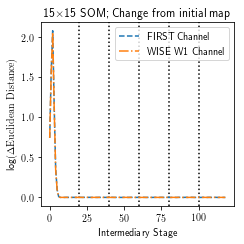

In [31]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.5))

ax.plot(np.arange(len(diff_first)), np.gradient(diff_first), ls='--', label='FIRST Channel')
ax.plot(np.arange(len(diff_wise)), np.gradient(diff_wise), ls='-.', label='WISE W1 Channel')
for s in stages:
    ax.axvline(s, color='black', ls=':', zorder=0)

ax.legend()
ax.set(xlabel='Intermediary Stage', ylabel=r'log$\left(\Delta\mathrm{Euclidean\ Distance}\right)$',
      title='15$\\times$15 SOM; Change from initial map')
fig.tight_layout()

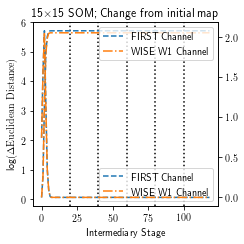

In [32]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.5))

ax2 = ax.twinx()

ax.plot(np.arange(len(diff_first)), diff_first, ls='--', label='FIRST Channel')
ax.plot(np.arange(len(diff_wise)), diff_wise, ls='-.', label='WISE W1 Channel')
for s in stages:
    ax.axvline(s, color='black', ls=':', zorder=0)

ax.set(xlabel='Intermediary Stage', ylabel=r'log$\left(\Delta\mathrm{Euclidean\ Distance}\right)$',
      title='15$\\times$15 SOM; Change from initial map')

ax2.plot(np.arange(len(diff_first)), np.gradient(diff_first), ls='--', label='FIRST Channel')
ax2.plot(np.arange(len(diff_wise)), np.gradient(diff_wise), ls='-.', label='WISE W1 Channel')

ax.legend()
ax2.legend()


fig.tight_layout()
# fig.show()

In [33]:
base= '../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5'

new = None
diff_first = []
diff_wise = []
stages = []
for c in [0, 1]:
    count = 0
    old = None
    new = None
    for s in [1,2,3,4,5,6]:
        for i in range(20):
            som = pu.som(f'{base}_{s}_{i}.bin')
            print(som.path)
            im = som.get_som(channel=c)
            
            if new is None: 
                new = im
            else:
                count += 1
                old = new
                new = im
                ed = np.sqrt( np.sum( (new - old)**2. ) )
                if c == 0:
                    diff_first.append(ed)
                else:
                    diff_wise.append(ed)
                if i == 0 and c == 0:
                    stages.append(count)

../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_0.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_1.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_2.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_3.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_4.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_5.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_6.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_7.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_8.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_9.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_10.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_11.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_12.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95

../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_14.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_15.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_16.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_17.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_18.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_19.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_0.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_1.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_2.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_3.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_4.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_5.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_1_6.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S

../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_8.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_9.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_10.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_11.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_12.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_13.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_14.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_15.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_16.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_17.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_18.bin
../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_19.bin


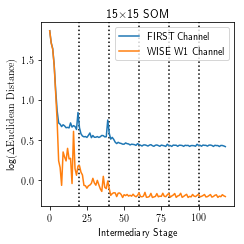

In [35]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.5))

ax.plot(np.arange(len(diff_first)), np.log10(diff_first), ls='-', label='FIRST Channel')
ax.plot(np.arange(len(diff_wise)), np.log10(diff_wise), ls='-', label='WISE W1 Channel')
for s in stages:
    ax.axvline(s, color='black', ls=':', zorder=0)

ax.legend()
ax.set(xlabel='Intermediary Stage', ylabel=r'log$\left(\Delta\mathrm{Euclidean\ Distance}\right)$',
      title='15$\\times$15 SOM')
fig.tight_layout()
fig.savefig('Images/SOM_Learning_Progress_DeltaStages.pdf')